In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

In [12]:
# Load Titanic dataset 
df = pd.read_csv('./breast-cancer-wisconsin.csv')

In [13]:

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df['F6'].replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

df['F6'] = pd.to_numeric(df['F6'], errors='coerce')
df['F6'] = df['F6'].astype(int)
df.info()

Empty DataFrame
Columns: [Sample, F1, F2, F3, F4, F5, F6, F7, F8, F9, Class]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sample  683 non-null    int64
 1   F1      683 non-null    int64
 2   F2      683 non-null    int64
 3   F3      683 non-null    int64
 4   F4      683 non-null    int64
 5   F5      683 non-null    int64
 6   F6      683 non-null    int64
 7   F7      683 non-null    int64
 8   F8      683 non-null    int64
 9   F9      683 non-null    int64
 10  Class   683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


/tmp/ipykernel_8454/1289672728.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].replace('?', np.nan, inplace=True)


In [14]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sample  683 non-null    int64
 1   F1      683 non-null    int64
 2   F2      683 non-null    int64
 3   F3      683 non-null    int64
 4   F4      683 non-null    int64
 5   F5      683 non-null    int64
 6   F6      683 non-null    int64
 7   F7      683 non-null    int64
 8   F8      683 non-null    int64
 9   F9      683 non-null    int64
 10  Class   683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Empty DataFrame


Class
2    444
4    239
Name: count, dtype: int64
Class
2    65.007321
4    34.992679
Name: count, dtype: float64


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


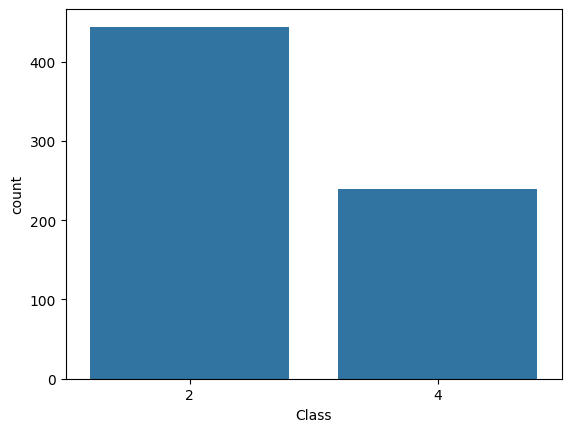

In [15]:
df = pd.get_dummies(df, drop_first=True)

print(df['Class'].value_counts())
print( (df['Class'].value_counts()/ df['Class'].value_counts().sum()) * 100)
sns.countplot(data=df, x='Class')
df.head()

In [16]:
attr = df.drop(columns=['Class', 'Sample'], axis=1)
target = df['Class']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,max_leaf_nodes=5)

In [18]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.9609756097560975  

 Confusion Matrix:
[[126   5]
 [  3  71]]

 Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       131
           4       0.93      0.96      0.95        74

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from C45 import C45Classifier

In [22]:
# Initialize the classifier (replace with C45Classifier if available)
# clf = DecisionTreeClassifier(criterion='entropy')  # C4.5 uses information gain (entropy)
clf=C45Classifier()
# Train the classifier
clf.fit(attr_train,target_train)
target_pred2 = clf.predict(attr_test)
print(f"\n Accuracy: {accuracy_score(target_test,target_pred2)}  ")

print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred2))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred2))



 Accuracy: 0.9463414634146341  

 Confusion Matrix:
[[124   7]
 [  4  70]]

 Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96       131
           4       0.91      0.95      0.93        74

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.94       205
weighted avg       0.95      0.95      0.95       205

